In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

<h3>Introdução</h3>
<p>Os bancos desempenham um papel crucial nas economias de mercado. Eles decidem quem pode obter financiamento e em que termos e pode tomar ou interromper as decisões de investimento. Para que os mercados e a sociedade funcionem, indivíduos e empresas precisam ter acesso ao crédito. Os algoritmos de pontuação de crédito, que adivinham a probabilidade de inadimplência, são o método utilizado pelos bancos para determinar se um empréstimo deve ou não ser concedido.</p>
<h3>Objetivo</h3>
<p>Criação de um modelo na qual possa tentar predizer a probabilidade do cliente conseguir pagar o empréstimo solicitado ao banco</p>
<h3>Sobre Dataset </h3>
<p>Historico de aprox. 250.000 Clientes na qual foi divido entre dataset de treino e test</p>
<h5 style='text-align: center'>Variable Name Description Type</h5>

<table>
<tr>
  <th>Variable</th>
  <th>Description</th>
</tr>
<tr>
  <td>SeriousDlqin2yrs</td>
  <td>Person experienced 90 days past due delinquency or worse Y/N</td>
</tr>
    <tr>
    <td>RevolvingUtilizationOfUnsecuredLines</td>
     <td>Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage</td>
    </tr>
     <tr>
    <td>RevolvingUtilizationOfUnsecuredLines</td>
     <td>Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage</td>
    </tr>
    <tr>
     <td>RevolvingUtilizationOfUnsecuredLines</td>
     <td>Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage</td>
    </tr>
     <tr>
     <td>Age</td>
     <td>Age of borrower in years integer</td>
    </tr>
      <tr>
     <td>NumberOfTime3059DaysPastDueNotWorse</td>
     <td>Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer</td>
    </tr>
     <tr>
     <td>DebtRatio</td>
     <td>Monthly debt payments, alimony,living costs divided by monthy gross income percentage</td>
    </tr>
      <tr>
     <td>MonthlyIncome</td>
     <td>Monthly income real</td>
    </tr>
     <tr>
     <td>MonthlyIncome</td>
     <td>Monthly income real</td>
    </tr>
      <tr>
     <td>NumberOfOpenCreditLinesAndLoans</td>
     <td>Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer</td>
    </tr>
      <tr>
     <td>NumberOfTimes90DaysLate</td>
     <td>Number of times borrower has been 90 days or more past due. integer</td>
    </tr>
     <tr>
     <td>NumberOfTimes90DaysLate</td>
     <td>Number of times borrower has been 90 days or more past due. integer</td>
    </tr>
      <tr>
     <td>NumberRealEstateLoansOrLines</td>
     <td>Number of mortgage and real estate loans including home equity lines of credit integer</td>
    </tr>
          <tr>
     <td>NumberOfTime60-89DaysPastDueNotWorse</td>
     <td>Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer</td>
    </tr>
          <tr>
     <td>NumberOfDependents</td>
     <td> Number of dependents in family excluding themselves (spouse, children etc.) integer</td>
    </tr>
    
</table>

In [119]:
df_train = pd.read_csv('cs-training.csv')
df_test = pd.read_csv('cs-test.csv')

In [120]:
print('Train Shape is :',df_train.shape,'\nTest shape is :',df_test.shape)

Train Shape is : (150000, 12) 
Test shape is : (101503, 12)


In [121]:
df_train.head(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [122]:
(df_train.isna().sum()/len(df_train)) * 100

Unnamed: 0                               0.000000
SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           19.820667
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.616000
dtype: float64

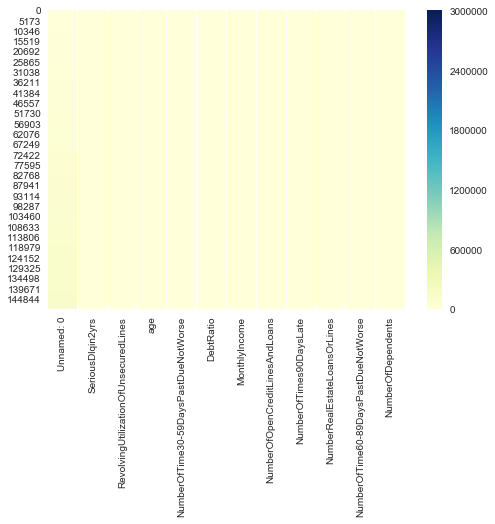

In [123]:
mask = df_train.isnull()
sns.heatmap(df_train, mask=mask,cmap="YlGnBu");

<p>Devido a quantidade menor que 5% de missing na coluna NumberOfDependents eu preferi optar pelo drop da mesma</p>

In [124]:
df_train.dropna(subset=['NumberOfDependents'],inplace=True)

In [125]:
df_train.shape

(146076, 12)

In [126]:
df_append = df_train.append(df_test)

In [127]:
(df_train.SeriousDlqin2yrs.value_counts() / len(df_train) ) * 100

0    93.258988
1     6.741012
Name: SeriousDlqin2yrs, dtype: float64

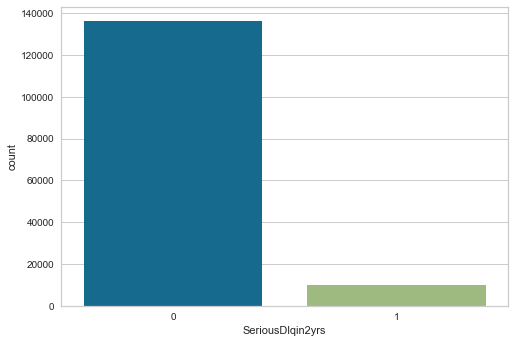

In [128]:
sns.countplot(x="SeriousDlqin2yrs", data=df_train);

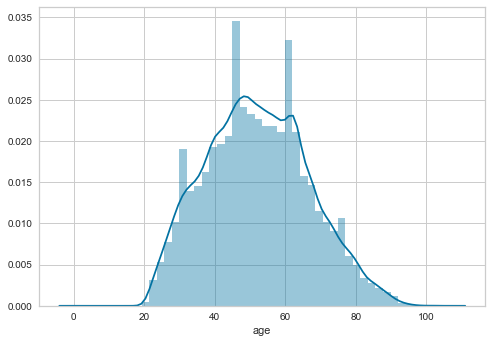

In [129]:
sns.distplot((df_train.age));

<p>Acabei optando em realizar o teste agrupando a idade dos clientes onde no modelo final iria testar qual das duas formas teria a melhor performace,sendo apenas a coluna idade ou ela agrupada </p>

In [149]:
bins= [20,60,80,120]
labels_age = ['Adult','Young Senior','Senior']
df_append['AgeGroup'] = pd.cut(df_append['age'], bins=bins, labels=labels_age, right=False)
mask_2 = {
         'Adult':0,
         'Young Senior':1,
         'Senior':2}
df_append['AgeGroup'].replace(mask_2,inplace=True)

In [152]:
df_append['AgeGroup'].value_counts()

0.0    168451
1.0     69838
2.0      9289
Name: AgeGroup, dtype: int64

In [153]:
df_append['MonthlyIncome'].fillna(df_append['MonthlyIncome'].median(),inplace=True)
df_append['NumberOfDependents'].fillna(df_append['NumberOfDependents'].median(),inplace=True)

<p>Optei em separar as idades de 18 até 60 como "adultos" pois acima disso já irei considerar o mesmo como um senhor(aposentado), outro detalhe que fiz uma classificação acima de 80 anos devido a algumas regras que pelo menos existem no brasil mesmo que o dataset original não seja brasileiro</p>

<p>"O perfil que tem maior índice de aprovação é do empregado do setor privado, graduado e renda média próxima a 3,2 mil reais. Esse tipo de consumidor correspondem a apenas 9% dos que completaram o cadastro para pleitear crédito, mas 37% foram aprovados." </p>
<img src='exame.png'>
<p>"Das solicitações feitas para pagar dívidas, 25% foram aprovadas; para investimentos, 26%, e para reformar a casa 28%. A maior taxa de aprovação foi para compras, viagens e festas, com 32%."
<a href="https://exame.com/seu-dinheiro/os-perfis-com-mais-chances-de-conseguir-um-emprestimo-segundo-a-finanzero/">Fonte Exame</a>
</p>
<p> com isso tentamos puxar para a realidade do brasil para ver se o perfil que corresponde aqui possa ser parecido com o mesmo que o dataset representa </p>

In [154]:
df_train = df_append[0:146076]
df_test = df_append[146076:]

In [155]:
#df_append = df_append[df_append != 5400]
df_adult = df_train[df_train['AgeGroup'] == 0]

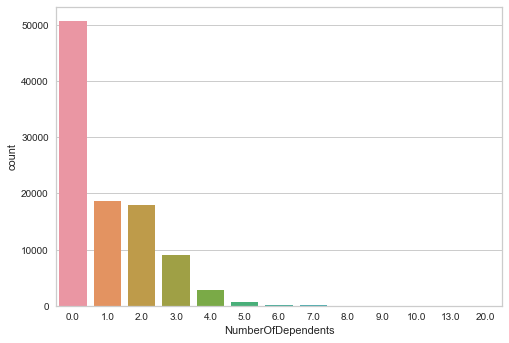

In [156]:
sns.countplot(x='NumberOfDependents',data=df_adult);

<p>Com isso percebemos que para o nosso dataset atual temos que nosso grupo de adultos tendem a ter até 4 dependentes,com uma baixa taxa acima disso</p>

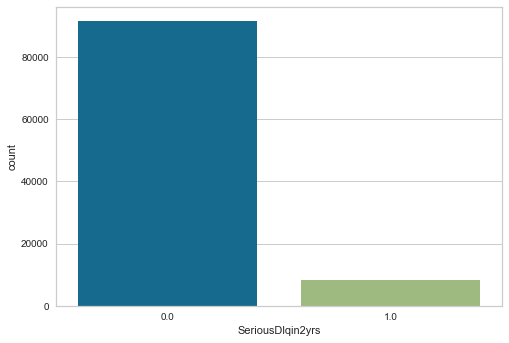

In [157]:
sns.countplot(df_adult.SeriousDlqin2yrs);

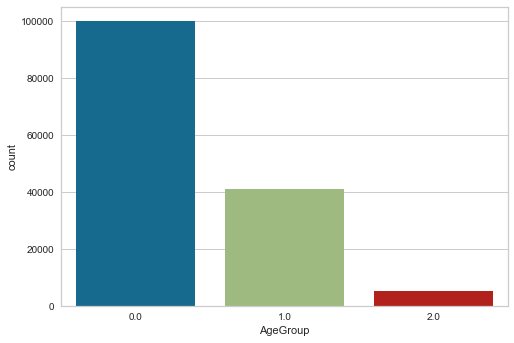

In [158]:
sns.countplot(x="AgeGroup", data=df_train);

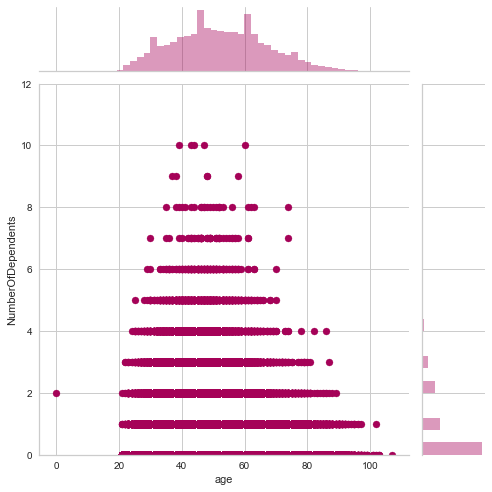

In [159]:
g = sns.jointplot("age", "NumberOfDependents", data=df_train, ylim=(0, 12),
                  color="m", height=7)

<p>mesmo que no dataset principal tenhamos dropado a coluna numberOfDependents no nosso dataset de test temos os mesmo ainda como nullos então iremos optar em preencher o mesmo por valores da nossa mediana

In [168]:
df_train['AgeGroup'].fillna(df_train['AgeGroup'].median(),inplace=True)

In [169]:
X = df_train.drop(columns={'Unnamed: 0','age','SeriousDlqin2yrs'})
y = df_train['SeriousDlqin2yrs']

In [170]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

In [171]:
from sklearn.metrics import auc,roc_curve
def plot_roc(pred):
    fpr,tpr,_ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operating Characteristic')
    sns.lineplot(fpr, tpr, label = 'AUC = %0.4f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [173]:
print('Train Shapes',X_train.shape,' and ',y_train.shape,'\nTest Shapes',X_test.shape,' and ' ,y_test.shape,'\nOutput Values\n',y_train.value_counts())

Train Shapes (116860, 10)  and  (116860,) 
Test Shapes (29216, 10)  and  (29216,) 
Output Values
 0.0    108955
1.0      7905
Name: SeriousDlqin2yrs, dtype: int64


In [174]:
smote = SMOTE(sampling_strategy = 'minority',k_neighbors = 2,random_state=0)
X_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)

#Realizar Teste Smote + kfold(com cv)

In [175]:
print('Train Shapes',X_train_smote.shape,' and ',y_train_smote.shape,'\nTest Shapes',X_test.shape,' and ' ,y_test.shape,'\nOutput Values\n',y_train_smote.value_counts())

Train Shapes (217910, 10)  and  (217910,) 
Test Shapes (29216, 10)  and  (29216,) 
Output Values
 1.0    108955
0.0    108955
Name: SeriousDlqin2yrs, dtype: int64


Foi realizado um teste utilizando Smote para upsample porem os resultados foram pior do que com os dados da forma que estavam(desbalanceados) ,devido a isso foi optado em seguir com os dados desbalanceado para os modelos

Optando por fazer um modelo base com randon forest apenas para teste e seleção visual das features

In [176]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

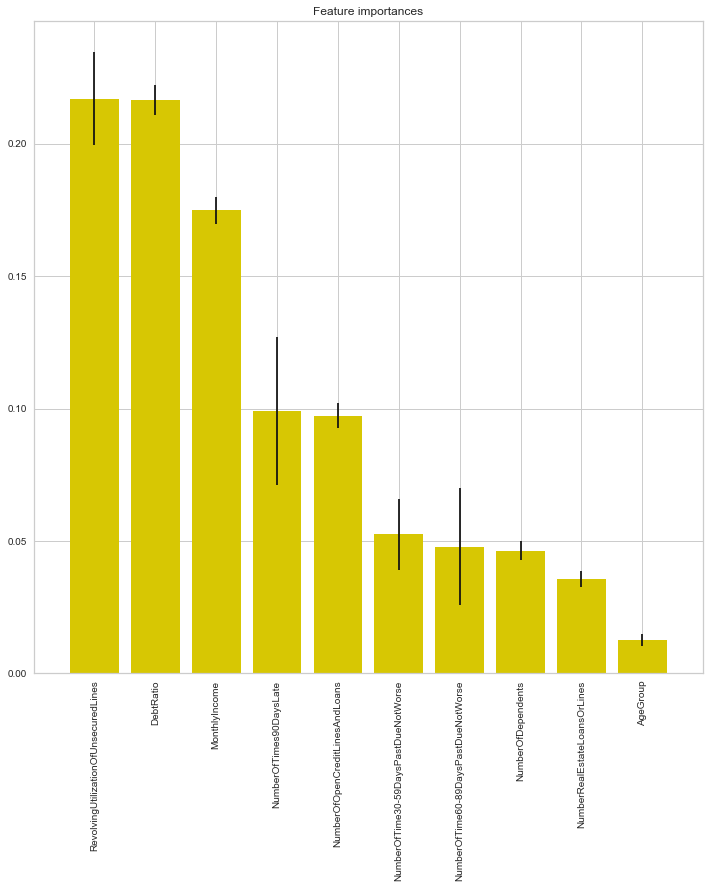

In [177]:
feat_names = X.columns.values
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="y", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [178]:
pred = clf.predict_proba(X_test)[:,1]
#Predict Primeiro modelo basico
print(roc_auc_score(y_test, pred))

0.8243102268341105


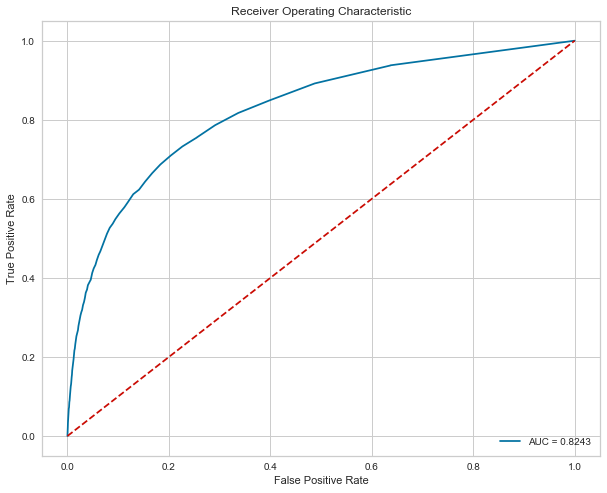

In [179]:
plot_roc(pred)

In [180]:
Lgb = LGBMClassifier(objective='binary',metrics ='auc')

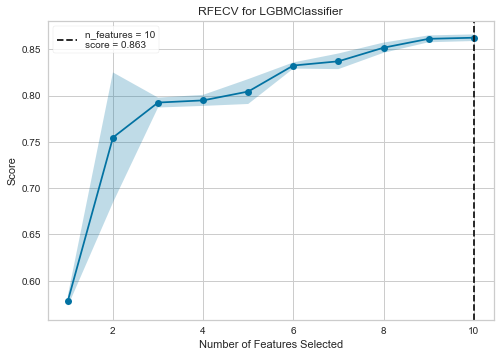

In [181]:
cv = StratifiedKFold(5)
visualizer = RFECV(Lgb, cv=cv, scoring='roc_auc')
visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show();           # Finalize and render the figure

In [182]:
pred_rfe = visualizer.predict_proba(X_test)[:,1]

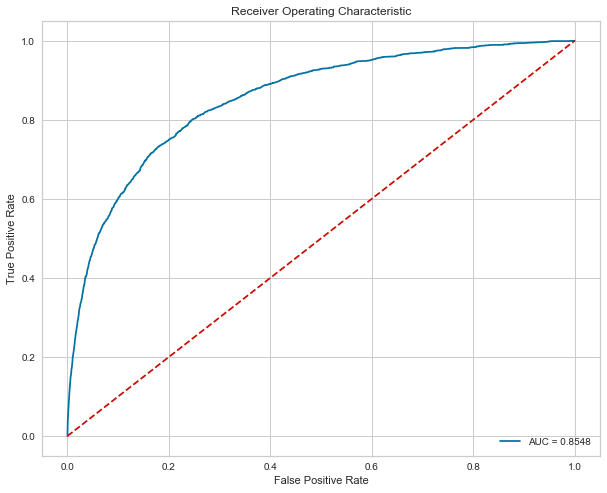

In [183]:
plot_roc(pred_rfe)

In [184]:
from hyperopt import hp, tpe, fmin
from sklearn.model_selection import cross_val_score

In [185]:
#Usando Hypteropt
space = {'n_estimators':hp.quniform('n_estimators', 10, 4000, 10),
        'learning_rate':hp.uniform('learning_rate', 0.00001, 0.03),
         'max_depth':hp.quniform('max_depth', 3,7,1),
         'subsample':hp.uniform('subsample', 0.60, 0.95),
         'colsample_bytree':hp.uniform('colsample_bytree', 0.60, 0.95),
         'reg_lambda': hp.uniform('reg_lambda', 1, 20),
        }

def objective(params):
    params = {'n_estimators': int(params['n_estimators']),
             'learning_rate': params['learning_rate'],
             'max_depth': int(params['max_depth']),
             'subsample': params['subsample'],
             'colsample_bytree': params['colsample_bytree'],
             'reg_lambda': params['reg_lambda'],
             }
    
    lgbm= LGBMClassifier(**params)
    cv = StratifiedKFold(5)
    score = cross_val_score(lgbm, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1).mean()
    return -score

In [186]:
best = fmin(fn= objective, space= space, max_evals=20, rstate=np.random.RandomState(1), algo=tpe.suggest)

100%|███████████████████████████████████████████████| 20/20 [08:25<00:00, 24.73s/trial, best loss: -0.8649054697679824]


In [187]:
lgbm = LGBMClassifier(random_state=0,
                        n_estimators=int(best['n_estimators']), 
                        colsample_bytree= best['colsample_bytree'],
                        learning_rate= best['learning_rate'],
                        max_depth= int(best['max_depth']),
                        subsample= best['subsample'],
                        reg_lambda= best['reg_lambda']
                       )

lgbm.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.7162219560799004,
               learning_rate=0.003721300336530525, max_depth=5,
               n_estimators=2520, random_state=0, reg_lambda=7.017000573168227,
               subsample=0.6716479399150603)

In [188]:
lgbm_hype = lgbm.predict_proba(X_test)[:,1]

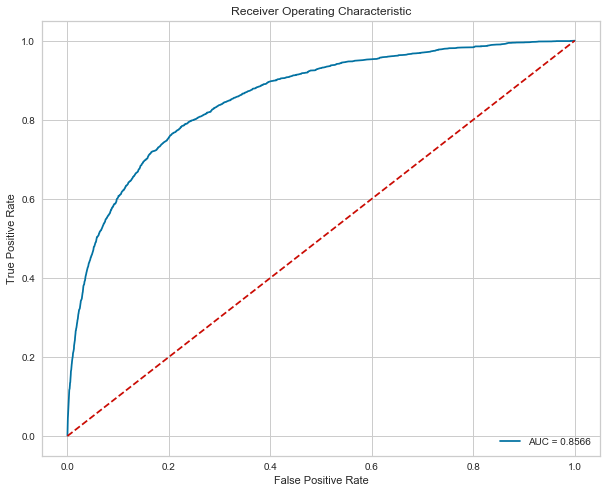

In [189]:
plot_roc(lgbm_hype)

In [192]:
#prediction
df_x_test = df_test.drop(columns={'Unnamed: 0','age','SeriousDlqin2yrs'})
pred = lgbm.predict_proba(df_x_test)[:,1]
#output
output = pd.DataFrame({'Id': df_test['Unnamed: 0'],'Probability': pred})
output.to_csv('submission.csv', index=False)

<img src="result.png">